In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_balanced_raw = pd.read_csv(r"/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_balanced_raw

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


### Summary Statistics

In [3]:
diabetes_balanced_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
diabetes_balanced_raw.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
diabetes_balanced_raw.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


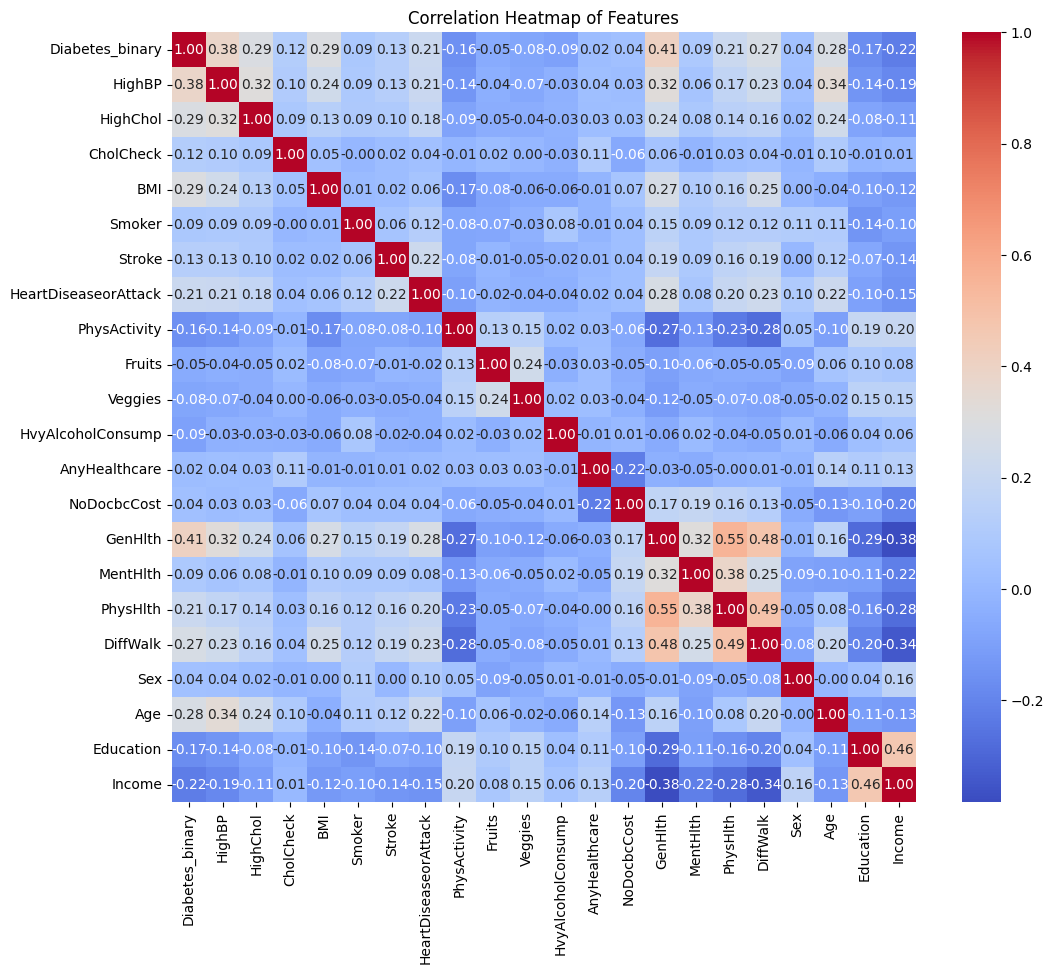

In [6]:
plt.figure(figsize=(12, 10))
corr_matrix = diabetes_balanced_raw.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

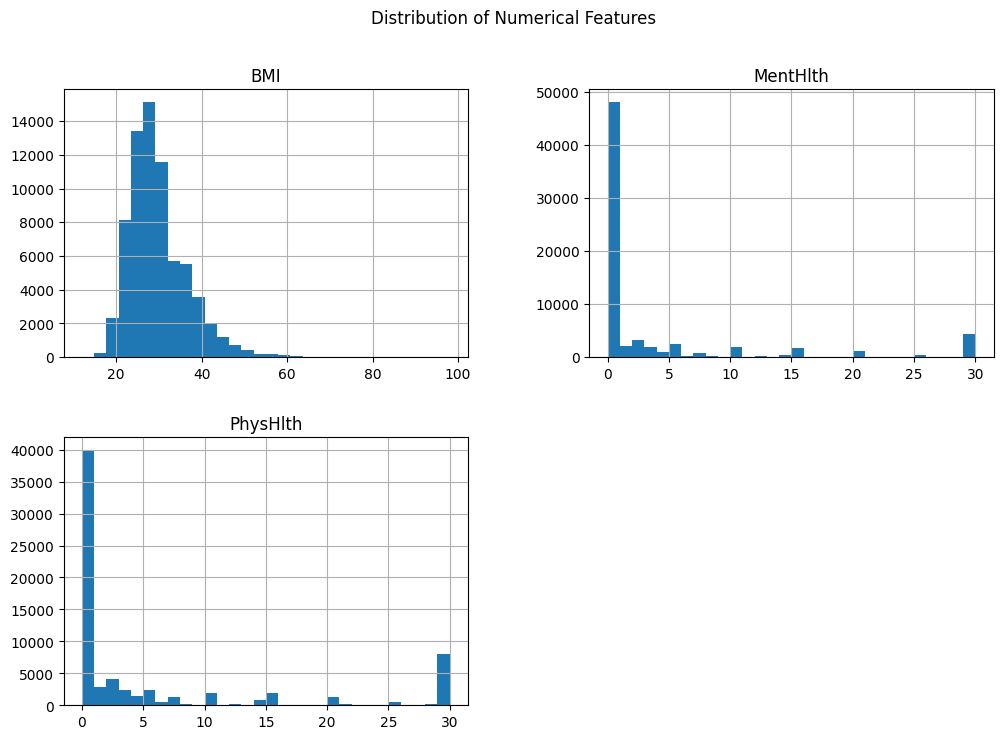

In [7]:
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
diabetes_balanced_raw[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

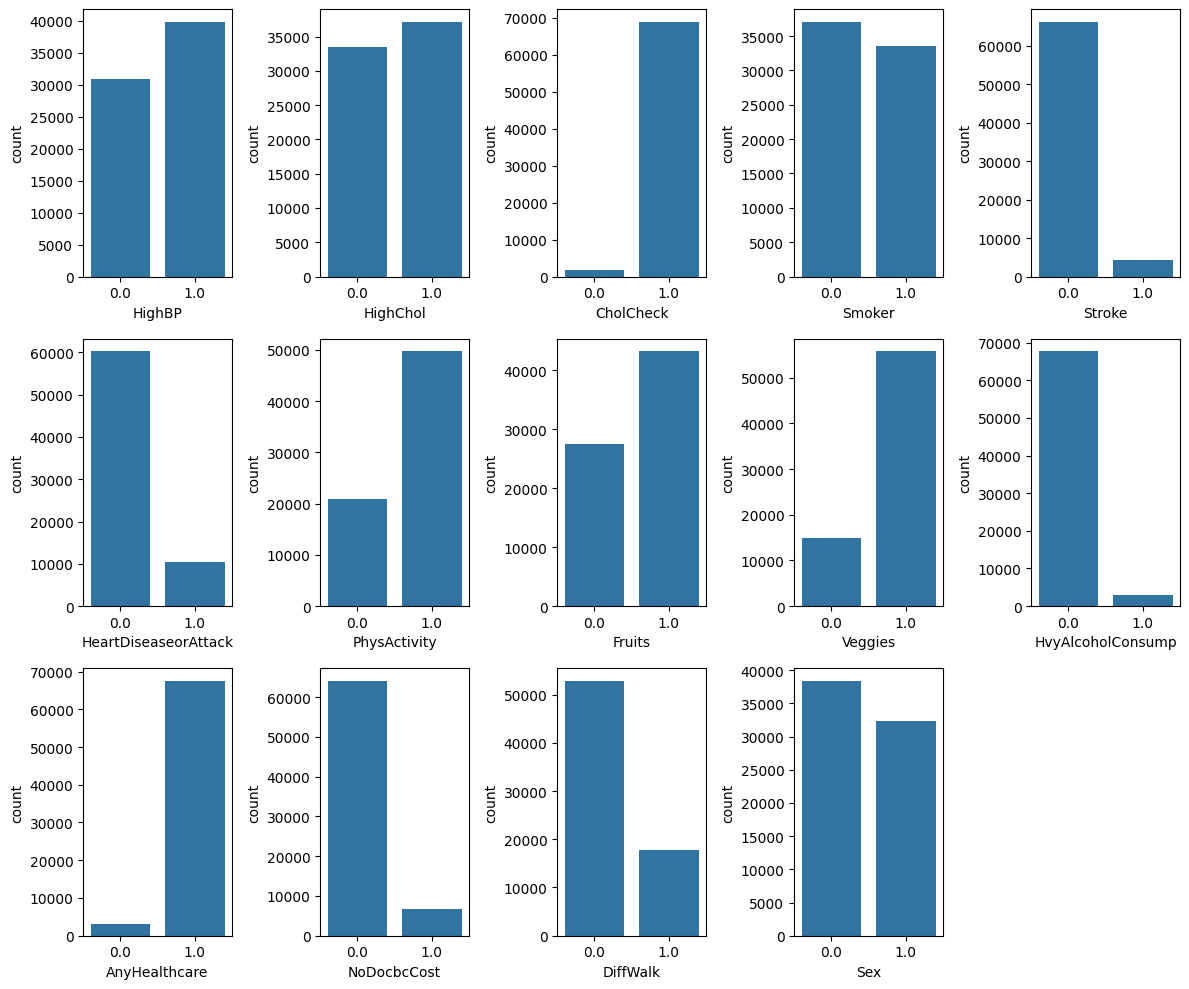

In [8]:
categorical_columns = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'DiffWalk', 'Sex'
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 5, i)
    sns.countplot(x=col, data=diabetes_balanced_raw)

plt.tight_layout()
plt.show()

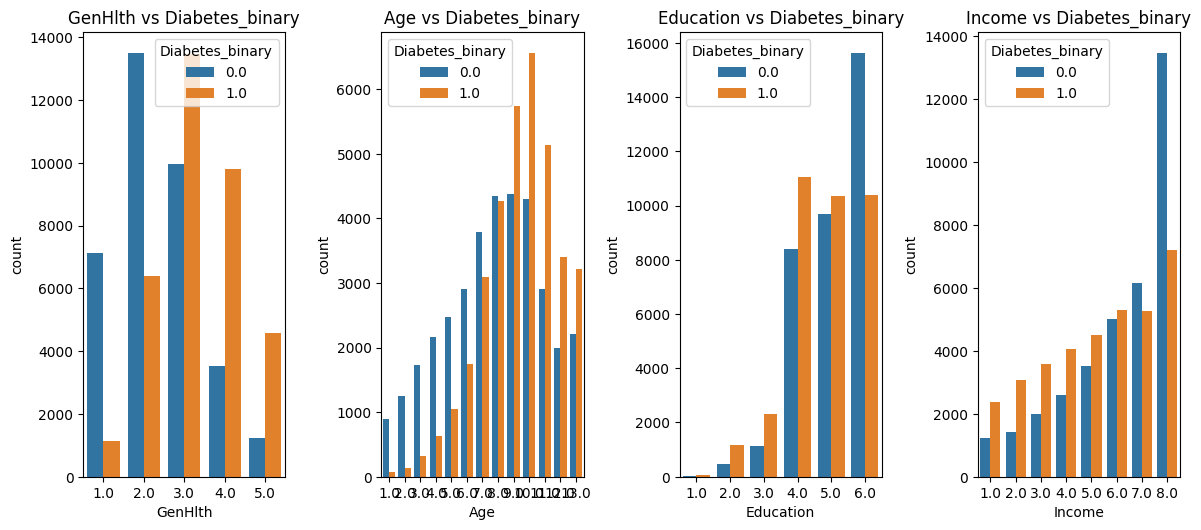

In [9]:
ordinal_columns = ['GenHlth', 'Age', 'Education', 'Income']

plt.figure(figsize=(12, 10))
for i, col in enumerate(ordinal_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, hue='Diabetes_binary', data=diabetes_balanced_raw)
    plt.title(f'{col} vs Diabetes_binary')
plt.tight_layout()
plt.show()

<Axes: >

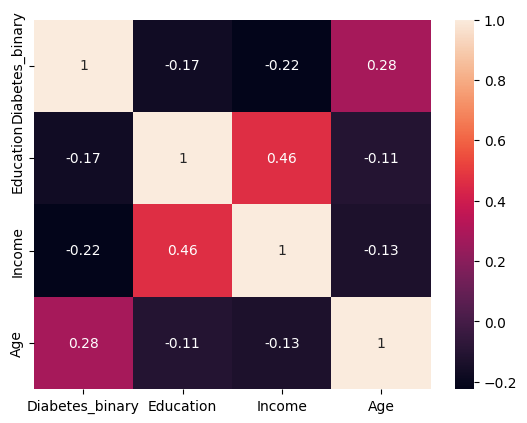

In [10]:
sns.heatmap(diabetes_balanced_raw[['Diabetes_binary', 'Education', 'Income', 'Age']].corr(), annot=True)

<Axes: >

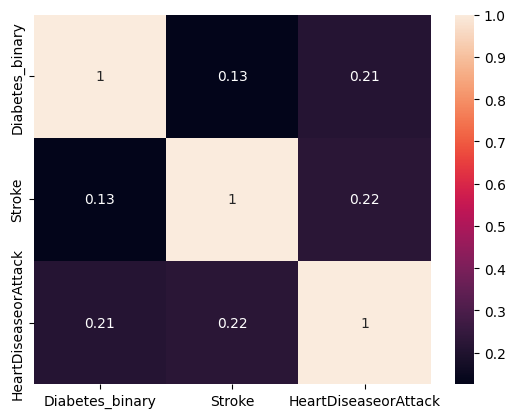

In [11]:
sns.heatmap(diabetes_balanced_raw[['Diabetes_binary', 'Stroke', 'HeartDiseaseorAttack']].corr(), annot=True)

In [12]:
print(" Skewness of 'BMI' :", diabetes_balanced_raw['BMI'].skew())
print(" Skewness of 'MentHlth' :", diabetes_balanced_raw['MentHlth'].skew())
print(" Skewness of 'PhysHlth' :", diabetes_balanced_raw['PhysHlth'].skew())


 Skewness of 'BMI' : 1.7191801918140364
 Skewness of 'MentHlth' : 2.388109639646643
 Skewness of 'PhysHlth' : 1.6573043998917887


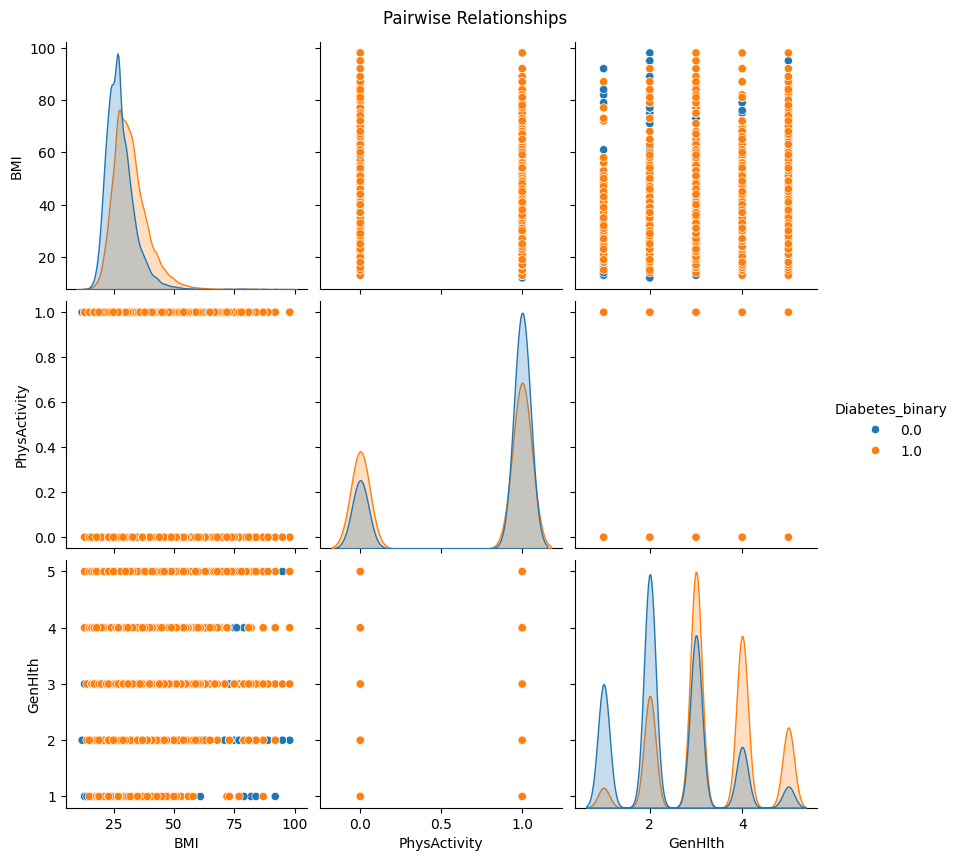

In [ ]:
sns.pairplot(diabetes_balanced_raw[selected_features], hue="Diabetes_binary", diag_kind="kde", height=2.8)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

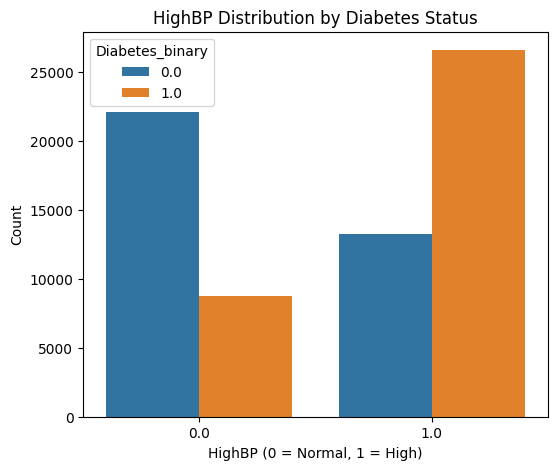

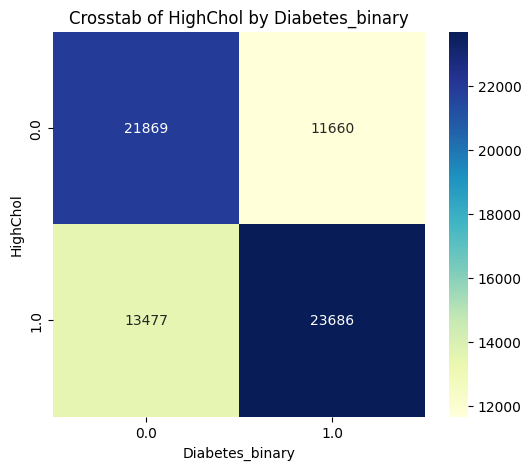

In [13]:
plt.figure(figsize=(6, 5))
sns.countplot(x="HighBP", hue="Diabetes_binary", data=diabetes_balanced_raw)
plt.title("HighBP Distribution by Diabetes Status")
plt.xlabel("HighBP (0 = Normal, 1 = High)")
plt.ylabel("Count")
plt.show()

ct = pd.crosstab(diabetes_balanced_raw['HighChol'], diabetes_balanced_raw['Diabetes_binary'])
plt.figure(figsize=(6, 5))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Crosstab of HighChol by Diabetes_binary")
plt.xlabel("Diabetes_binary")
plt.ylabel("HighChol")
plt.show()

In [14]:
diabetes_balanced_raw.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#### Interactive Visualisation

In [15]:
import plotly.express as px

fig = px.density_contour(diabetes_balanced_raw, x="BMI", y="PhysActivity", color="Diabetes_binary",
                         title="Interactive Density Contour Plot: BMI vs. PhysActivity")
fig.show()

#### Outlier Detection

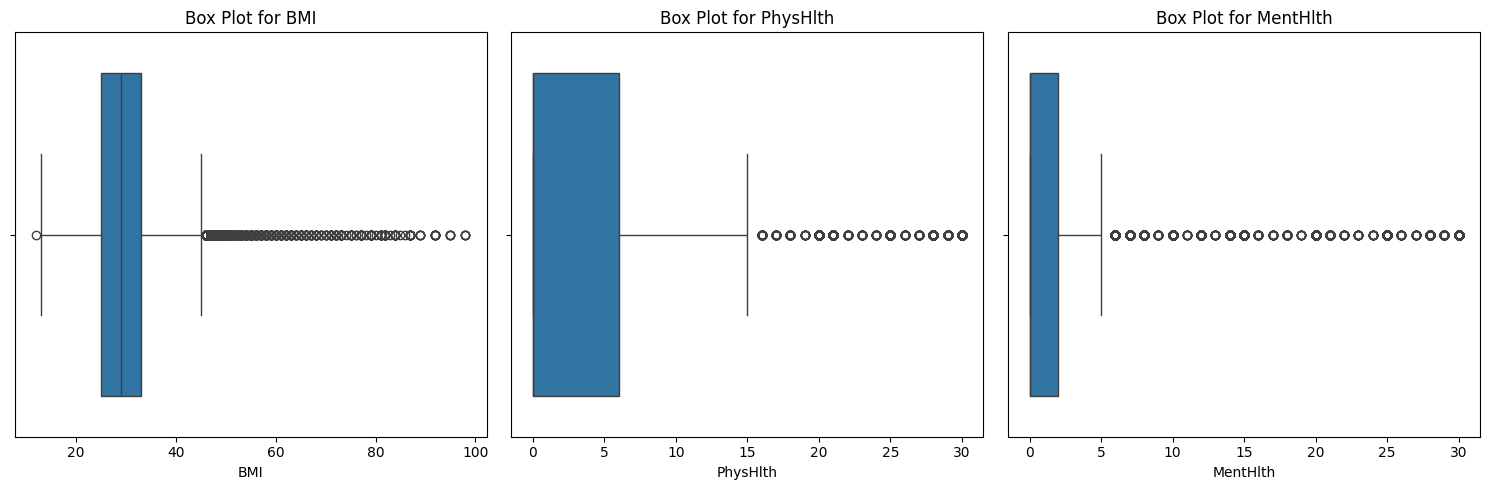

BMI - Number of outliers: 2181
PhysHlth - Number of outliers: 10624
MentHlth - Number of outliers: 11816


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['BMI', 'PhysHlth', 'MentHlth']

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (diabetes_balanced_raw[column] < lower_bound) | (df[column] > upper_bound)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, columns_to_check):
    sns.boxplot(x=diabetes_balanced_raw[col], ax=ax)
    ax.set_title(f"Box Plot for {col}")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()
for col in columns_to_check:
    outlier_mask = detect_outliers_iqr(diabetes_balanced_raw, col)
    num_outliers = outlier_mask.sum()
    print(f"{col} - Number of outliers: {num_outliers}")


### Pre Processing

In [18]:
X = diabetes_balanced_raw.drop('Diabetes_binary', axis=1)
y = diabetes_balanced_raw['Diabetes_binary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=17
)

In [20]:
def robust_scale(column):
    median = np.median(column)
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    return (column - median) / iqr

In [21]:
columns_to_scale = ['BMI', 'MentHlth', 'PhysHlth']
for col in columns_to_scale:
    X_train[col + '_scaled'] = robust_scale(X_train[col])
    X_test[col + '_scaled'] = robust_scale(X_test[col])

print(X_train.describe())
print(X_test.describe())

             HighBP      HighChol     CholCheck           BMI        Smoker  \
count  56553.000000  56553.000000  56553.000000  56553.000000  56553.000000   
mean       0.564002      0.523969      0.975315     29.861157      0.475412   
std        0.495891      0.499430      0.155164      7.158690      0.499400   
min        0.000000      0.000000      0.000000     12.000000      0.000000   
25%        0.000000      0.000000      1.000000     25.000000      0.000000   
50%        1.000000      1.000000      1.000000     29.000000      0.000000   
75%        1.000000      1.000000      1.000000     33.000000      1.000000   
max        1.000000      1.000000      1.000000     98.000000      1.000000   

             Stroke  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  56553.000000          56553.000000  56553.000000  56553.000000   
mean       0.062419              0.149152      0.702138      0.613018   
std        0.241918              0.356242      0.457323      0.487064

In [22]:
X_train['GenHlth'] = X_train['GenHlth'].apply(lambda x: 6 - x)
X_test['GenHlth'] = X_test['GenHlth'].apply(lambda x: 6 - x)

In [23]:
columns_to_drop = [
    'CholCheck',
    'Stroke',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'Education',
    'BMI',
    'MentHlth',
    'PhysHlth'
]

X_train = X_train.drop(columns = columns_to_drop)
X_test = X_test.drop(columns = columns_to_drop)